# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [32]:
# save config information.
url ="http://api.openweathermap.org/data/2.5/weather?"
units="metrics"

In [33]:
new_city=[]
lat=[]         
lng=[]           
max_temp=[]    
humidity =[]     
cloudiness =[] 
wind_speed =[]   
country =[]      
date  =[]   
index_counter=0
set_counter=1

query_url=(f"{url}appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=36d27378545f7daafa9d3ff4e9ef2e7a&units=metrics&q='

In [34]:
print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:
    try:
        #time.sleep(1)

        response=requests.get(query_url +city)
        json_response=response.json()
        #print(json.dumps(json_response, indent=4, sort_keys=True))
        new_city.append(json_response["name"])
        lat.append(json_response["coord"]["lat"])
        lng.append(json_response["coord"]["lon"])
        max_temp.append(json_response["main"]["temp_max"])
        humidity.append(json_response["main"]["humidity"])
        cloudiness.append(json_response["clouds"]["all"])
        wind_speed.append(json_response["wind"]["speed"])
        country.append(json_response["sys"]["country"])
        date.append(json_response["dt"])
        if index_counter>99:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
        
        print(f"Processing {index_counter} of set {set_counter}:{city}")
    except KeyError:
        print("Another one!")
print(f"-------------------------------")
print(f"Ending Data Retrieval")

Beginning Data Retrieval
------------------------
Processing 1 of set 1:kavieng
Processing 2 of set 1:quime
Processing 3 of set 1:barrow
Processing 4 of set 1:castro
Processing 5 of set 1:sorland
Processing 6 of set 1:buala
Processing 7 of set 1:mataura
Processing 8 of set 1:cidreira
Processing 9 of set 1:port elizabeth
Processing 10 of set 1:isangel
Processing 11 of set 1:iqaluit
Processing 12 of set 1:esperance
Another one!
Processing 13 of set 1:mar del plata
Processing 14 of set 1:pevek
Processing 15 of set 1:longyearbyen
Processing 16 of set 1:nagato
Processing 17 of set 1:dicabisagan
Another one!
Processing 18 of set 1:bluff
Processing 19 of set 1:port lincoln
Processing 20 of set 1:hobart
Processing 21 of set 1:saint-augustin
Processing 22 of set 1:salalah
Processing 23 of set 1:terney
Processing 24 of set 1:busselton
Processing 25 of set 1:praia da vitoria
Processing 26 of set 1:cherskiy
Processing 27 of set 1:bandarbeyla
Processing 28 of set 1:kruisfontein
Processing 29 of set

Processing 44 of set 3:rafaela
Processing 45 of set 3:adrar
Processing 46 of set 3:miles city
Processing 47 of set 3:puerto narino
Processing 48 of set 3:quatre cocos
Processing 49 of set 3:saint-prosper
Processing 50 of set 3:fez
Processing 51 of set 3:kyzyl-suu
Processing 52 of set 3:saint-joseph
Processing 53 of set 3:enid
Processing 54 of set 3:shingu
Processing 55 of set 3:auki
Processing 56 of set 3:kandrian
Processing 57 of set 3:price
Processing 58 of set 3:verkhnevilyuysk
Processing 59 of set 3:kogon
Processing 60 of set 3:halifax
Processing 61 of set 3:northam
Processing 62 of set 3:hami
Processing 63 of set 3:copiapo
Processing 64 of set 3:kushima
Processing 65 of set 3:upernavik
Processing 66 of set 3:grand gaube
Another one!
Processing 67 of set 3:lasa
Processing 68 of set 3:port hedland
Processing 69 of set 3:dalvik
Processing 70 of set 3:fortuna
Processing 71 of set 3:port said
Processing 72 of set 3:visnes
Processing 73 of set 3:pilar
Processing 74 of set 3:koppang
Proc

Processing 88 of set 5:cervo
Another one!
Processing 89 of set 5:chuy
Processing 90 of set 5:port blair
Processing 91 of set 5:pattan
Processing 92 of set 5:kalmunai
Processing 93 of set 5:nekrasovka
Processing 94 of set 5:ayan
Processing 95 of set 5:tigre
Processing 96 of set 5:sao joao de pirabas
Processing 97 of set 5:walvis bay
Processing 98 of set 5:udachnyy
Processing 99 of set 5:puerto del rosario
Processing 100 of set 5:rudbar
Processing 0 of set 6:hualmay
Processing 1 of set 6:laurel
Another one!
Processing 2 of set 6:padang
Processing 3 of set 6:nipawin
Processing 4 of set 6:rawson
Processing 5 of set 6:seoul
Processing 6 of set 6:luis correia
Processing 7 of set 6:ambilobe
Processing 8 of set 6:newala
Processing 9 of set 6:luwuk
Processing 10 of set 6:jinxi
Processing 11 of set 6:mount isa
Processing 12 of set 6:sosua
Processing 13 of set 6:constitucion
Processing 14 of set 6:broken hill
Processing 15 of set 6:sanawad
Processing 16 of set 6:agadez
Processing 17 of set 6:fare

In [35]:
new_weather_df=pd.DataFrame({"City":new_city,
                           "Lat":lat,
                           "Lng":lng,
                           "Max Temp":max_temp,
                           "Humidity":humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Date":date})
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.57,150.80,300.57,76,100,1.98,PG,1596983719
1,Quime,-16.98,-67.22,288.85,34,0,2.74,BO,1596983719
2,Barrow,71.29,-156.79,278.15,93,90,3.10,US,1596983714
3,Castro,-24.79,-50.01,295.08,43,0,2.16,BR,1596983719
4,Sørland,67.67,12.69,288.15,62,90,5.10,NO,1596983719


In [36]:
new_weather_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [37]:
new_weather_df.to_csv("../output_data/weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
new_weather2_df=new_weather_df.loc[new_weather_df["Humidity"]<=100]
new_weather2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.57,150.80,300.57,76,100,1.98,PG,1596983719
1,Quime,-16.98,-67.22,288.85,34,0,2.74,BO,1596983719
2,Barrow,71.29,-156.79,278.15,93,90,3.10,US,1596983714
3,Castro,-24.79,-50.01,295.08,43,0,2.16,BR,1596983719
4,Sørland,67.67,12.69,288.15,62,90,5.10,NO,1596983719
...,...,...,...,...,...,...,...,...,...
554,Nkowakowa,-23.89,30.29,293.15,30,0,6.70,ZA,1596983764
555,Shar,49.59,81.05,297.01,34,100,1.33,KZ,1596983764
556,Twentynine Palms,34.14,-116.05,300.93,27,1,3.60,US,1596983764
557,Gaur,26.77,85.27,302.89,79,100,4.36,NP,1596983764


In [39]:
new_weather2_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,18.742361,16.113113,294.926583,68.295170,50.835420,3.940751,1.596984e+09
std,33.249414,89.289088,8.475086,22.299858,39.167384,2.658288,6.616751e+01
min,-54.800000,-175.200000,271.150000,7.000000,0.000000,0.270000,1.596983e+09
25%,-9.050000,-64.760000,288.150000,55.000000,7.500000,1.850000,1.596984e+09
50%,20.900000,20.040000,297.040000,74.000000,50.000000,3.570000,1.596984e+09
75%,46.420000,96.270000,301.150000,85.000000,90.000000,5.555000,1.596984e+09
max,78.220000,178.420000,317.210000,100.000000,100.000000,14.530000,1.596984e+09


In [40]:
#  Get the indices of cities that have humidity over 100%.
cities_indicies=new_weather_df.loc[new_weather_df["Humidity"]>100].index
cities_indicies


Int64Index([], dtype='int64')

In [41]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_indexes=new_weather_df.loc[(new_weather_df["Humidity"]<humidity_lower_bound) & (new_weather_df["Humidity"]>humidity_upper_bound)].index
outliers_indexes



clean_city_data = new_weather_df.drop(outliers_indexes, inplace=False)
fresh_data=clean_city_data.sort_values("Humidity", ascending=False)
fresh_data


10.0 and 130.0 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
315,Wahiawā,21.50,-158.02,298.15,100,90,1.50,US,1596983744
84,Hambantota,6.12,81.12,298.15,100,90,4.60,LK,1596983725
359,Da Lat,11.95,108.44,289.57,100,70,1.19,VN,1596983643
221,Ruteng,-8.61,120.47,289.98,100,6,0.47,ID,1596983736
334,Petropavlovsk-Kamchatskiy,53.05,158.65,284.15,100,75,1.00,RU,1596983746
...,...,...,...,...,...,...,...,...,...
346,Farah,32.50,62.50,307.41,13,0,8.49,AF,1596983746
263,Kumul,42.80,93.45,305.19,12,0,7.78,CN,1596983739
251,Fes,34.04,-5.00,314.15,12,20,4.10,MA,1596983738
128,Aswān,24.09,32.91,317.21,8,0,8.02,EG,1596983729


In [42]:
#This is my own method and it's working 

humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

new_day_df=new_weather_df.loc[(new_weather_df["Humidity"]>humidity_lower_bound) & (new_weather_df["Humidity"]<humidity_upper_bound)]
new_day_df=new_day_df.sort_values("Humidity",ascending=False)
new_day_df

10.0 and 130.0 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
106,Valparaíso,-33.04,-71.63,285.37,100,40,3.60,CL,1596983440
288,Norman Wells,65.28,-126.83,286.15,100,75,2.10,CA,1596983741
183,Alofi,-19.06,-169.92,288.15,100,24,0.50,NU,1596983733
329,Carnarvon,-24.87,113.63,290.15,100,75,5.10,AU,1596983745
201,Antón Lizardo,19.05,-95.98,297.04,100,90,4.35,MX,1596983734
...,...,...,...,...,...,...,...,...,...
425,Atar,20.52,-13.05,316.90,13,1,0.77,MR,1596983753
346,Farah,32.50,62.50,307.41,13,0,8.49,AF,1596983746
203,Hīt,33.64,42.83,313.61,13,0,5.43,IQ,1596983734
251,Fes,34.04,-5.00,314.15,12,20,4.10,MA,1596983738


In [43]:
# Extract relevant fields from the data frame
extract_data=new_day_df[["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
extract_data


,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
106,-33.04,285.37,100,40,3.60
288,65.28,286.15,100,75,2.10
183,-19.06,288.15,100,24,0.50
329,-24.87,290.15,100,75,5.10
201,19.05,297.04,100,90,4.35
...,...,...,...,...,...
425,20.52,316.90,13,1,0.77
346,32.50,307.41,13,0,8.49
203,33.64,313.61,13,0,5.43
251,34.04,314.15,12,20,4.10


In [44]:
# Export the City_Data into a csv
extract_data.to_csv("../output_data/extra.csv",index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

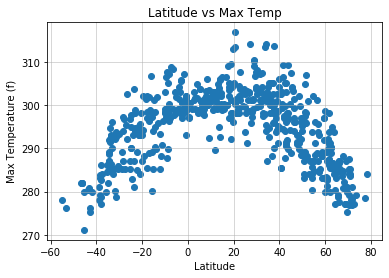

In [45]:
plt.scatter(extract_data['Lat'],extract_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title("Latitude vs Max Temp")

#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Max Temp.png")

plt.show()

## Latitude vs. Humidity Plot

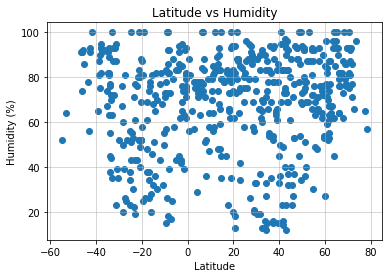

In [46]:
plt.scatter(extract_data['Lat'],extract_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

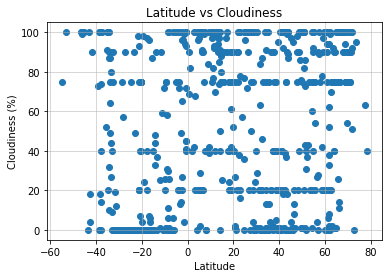

In [47]:
plt.scatter(extract_data['Lat'],extract_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

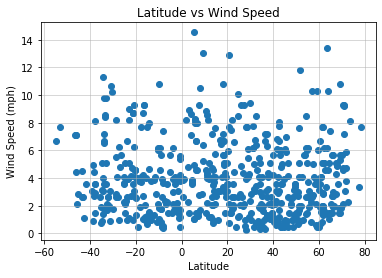

In [48]:
plt.scatter(extract_data['Lat'],extract_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [49]:
northern_hemisphere=extract_data.loc[extract_data["Lat"]>=0]
northern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
288,65.28,286.15,100,75,2.10
201,19.05,297.04,100,90,4.35
84,6.12,298.15,100,90,4.60
460,48.77,291.15,100,90,2.60
78,49.50,292.15,100,1,3.60
...,...,...,...,...,...
425,20.52,316.90,13,1,0.77
346,32.50,307.41,13,0,8.49
203,33.64,313.61,13,0,5.43
251,34.04,314.15,12,20,4.10


In [50]:
southern_hemisphere=extract_data.loc[clean_city_data["Lat"]<0]
southern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
106,-33.04,285.37,100,40,3.60
183,-19.06,288.15,100,24,0.50
329,-24.87,290.15,100,75,5.10
174,-21.21,295.15,100,93,1.00
39,-8.93,287.77,100,58,0.80
...,...,...,...,...,...
432,-28.47,297.21,20,0,2.82
401,-22.95,298.89,19,0,1.11
109,-8.74,305.13,18,30,2.60
134,-7.30,308.81,17,0,2.38


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

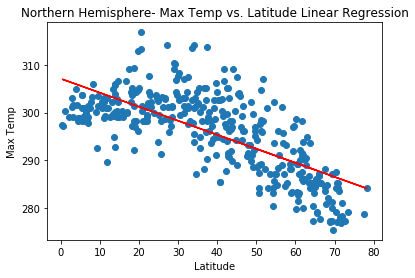

In [51]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

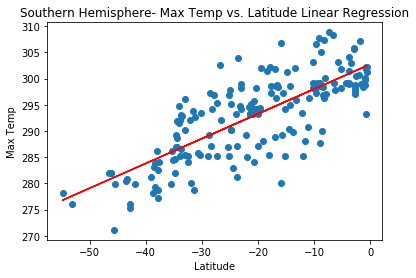

In [52]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

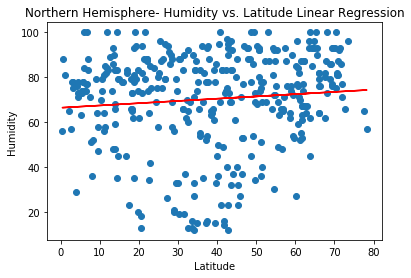

In [53]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

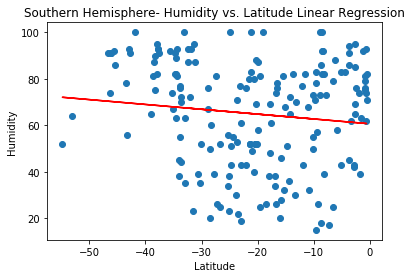

In [54]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Humidity vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

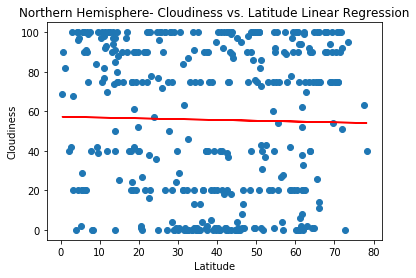

In [55]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

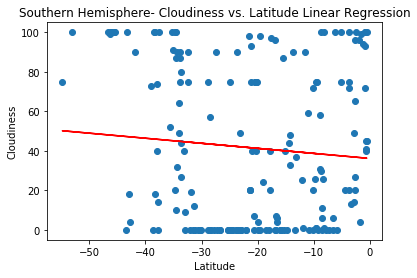

In [56]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

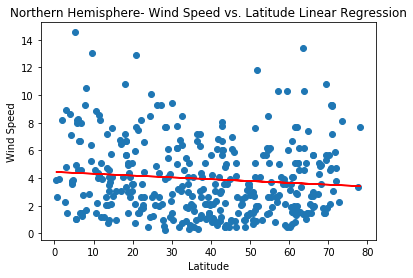

In [57]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere- Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

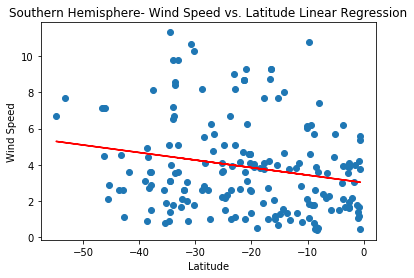

In [58]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere- Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline